In [2]:
%%bash
# Do not change or modify this file
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download the data files from github
# If the data file does not exist in the colab environment
if [[ ! -f ./quotes_by_char.csv ]]; then 
   # download the data file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/quotes_by_char.csv  
fi

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=ebb7c6ac234fb3f5894ad2ef14d9ee1874a71b1f0f07562a667223d403510969
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


--2020-11-10 04:38:26--  https://raw.githubusercontent.com/wewilli1/ist718_data/master/quotes_by_char.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4352265 (4.2M) [text/plain]
Saving to: ‘quotes_by_char.csv’

     0K .......... .......... .......... .......... ..........  1% 1.90M 2s
    50K .......... .......... .......... .......... ..........  2% 3.80M 2s
   100K .......... .......... .......... .......... ..........  3% 10.9M 1s
   150K .......... .......... .......... .......... ..........  4% 14.0M 1s
   200K .......... .......... .......... .......... ..........  5% 7.52M 1s
   250K .......... .......... .......... .......... ..........  7% 22.8M 1s
   300K .......... .......... .......... .......... ..........  8% 28.8M 1s
   350K .......... .......

William Shakespeare is considered one of the greatest playwrights in the English language. He is attributed with 38 plays, 154 sonnets, and other works. Even 400 years later, his writings are still be studied in most high schools and colleges in the US and elsewhere. Shakespeare’s complete works are available online at http://shakespeare.mit.edu/.  We will be using a data set which has Shakespeare character quotes.  A lot of people are fascinated by the characters in the Shakespeare plays.  The first first part of the assignment is to create a Shakespeare character recommender system which is capable of recommending new characters which are similar to a speicific character of interest.  We will also explore using PCA inference to find important words in character quotes.  In the second part of the assignment we will use K-Means clustering to try and find one or more character insights. 

# Part 1: Shakespeare Recommender System

# Question 1 (10 pts)
Read the quotes_by_char.csv file into a spark dataframe named `quotes_by_char_df`.  Drop the `Unnamed` column.  Transform the character column such that all character names are lower case.

In [3]:
# Course Instructor's code from previous assignment
# grading import statements
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

MAX_MEMORY = "12g"

spark = SparkSession \
  .builder \
  .master("local[*]")\
  .config("spark.memory.fraction", 0.8) \
  .config("spark.executor.memory", MAX_MEMORY) \
  .config("spark.driver.memory", MAX_MEMORY)\
  .config("spark.memory.offHeap.enabled",'true')\
  .config("spark.memory.offHeap.size",MAX_MEMORY)\
  .getOrCreate()

sc = spark.sparkContext
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

In [4]:
# Your code here
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession \
  .builder \
  .master("local[*]")\
  .config("spark.memory.fraction", 0.8) \
  .config("spark.executor.memory", "12g") \
  .config("spark.driver.memory", "12g")\
  .config("spark.memory.offHeap.enabled",'true')\
  .config("spark.memory.offHeap.size","12g")\
  .getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import pyspark.sql.functions as fn 
from pyspark.sql.functions import lower, col




quotes_by_char_df = spark.read.format("csv").option("header", "true").load(get_training_filename("quotes_by_char.csv"))
quotes_by_char_df = quotes_by_char_df.drop('_c0')
quotes_by_char_df = quotes_by_char_df.select(lower(col('character')).alias('character'), 'all_quotes')

In [5]:
# grading cell do not modify
display(quotes_by_char_df.toPandas().head())

,character,all_quotes
0,& c,"Well met, Master Ford."
1,a lord,"Sir, it was I."
2,a patrician,This man has marr'd his fortune. You do the no...
3,a player,So please your lordship to accept our duty. I ...
4,aaron,"Now climbeth Tamora Olympus' top, Safe out of ..."


##### Grading Feedback Cell Do Not Modify

# Question 2 (10 pts)
Create a spark pipeline named `pipe_pca_1` which performs Principal Component Analysis (PCA) on `chars_df`.  Use `pipe_pca_1` to create a new dataframe named `chars_pca_df`.  Analyze the resulting number of TF-IDF data rows and columns in your data.  Add code to the specially marked code cell below which prints the number of rows and cols in your TF-IDF data.  Using the analysis for the number of rows and cols in the data, explicitly set the K parameter in the spark PCA object equal to the maximum number of principal components.  Your overall solution should use sound data science techniques as outlined in lecture for making TF-IDF and PCA score calculations. We will be looking closely at how these calculations are made during the grading process.

In [6]:
# your code to create chars_pca_df here
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, Tokenizer, StopWordsRemover
from pyspark.ml.feature import IDF
from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import PCA
import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

# tokenizer object
#tokenizer = Tokenizer(inputCol="all_quotes", outputCol="words")
tokenizer = RegexTokenizer(minTokenLength=2)\
  .setGaps(False)\
  .setPattern("\\p{L}+")\
  .setInputCol("all_quotes")\
  .setOutputCol("words")

# stop word filter object
sw_remover = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("words_clean")

# tf object: compute tf score ( Parameter defined by Prof's recommendation on Piazza)
cv = CountVectorizer(minTF=4., minDF=10.,vocabSize = 2**10, inputCol='words_clean', outputCol="tf")

# idf object: compute tfidf score
idf = IDF(inputCol="tf", outputCol="tfidf")

# Create tfidf pipeline
tfidf_pipeline = Pipeline(stages=[tokenizer, sw_remover, cv, idf]).fit(quotes_by_char_df)

#transform dataset
char_df = tfidf_pipeline.transform(quotes_by_char_df)


# standardize scaler object: (centering dataset)
center = StandardScaler(withMean=True,
                           inputCol='tfidf', outputCol='z_tfidf')

# pricipal component analysis object( k=500 according to Prof's recommendation on Piazza)
pca = PCA(k=500, inputCol='z_tfidf', outputCol='scores')

# PCA pipeline 
pipe_pca_1 = Pipeline(stages=[center, pca])

# Fit the pipeline to quotes_by_char_df
model_pca = pipe_pca_1.fit(char_df)

# Create new dataframe with fitted model
chars_pca_df = model_pca.transform(char_df)

In [7]:

num_word = len(tfidf_pipeline.stages[2].vocabulary)
print('Resulting vocab size: ', num_word)
# print('\nThe explained variance from the fitted model is: ')
# print(sum(model_pca.stages[-1].explainedVariance))
# print("\nBelow are all the variance from each principal component: ")
# model_pca.stages[-1].explainedVariance


Resulting vocab size:  1024


In [8]:
# your code here to print the number of rows and cols in the TF-IDF data in chars_pca_df here

#print((chars_pca_df.count(), len(chars_pca_df.columns)))
print((chars_pca_df.count(), len(tfidf_pipeline.stages[2].vocabulary)))

(966, 1024)


In [9]:
# grading cell - do not modify
display(chars_pca_df.toPandas().head())

,character,all_quotes,words,words_clean,tf,tfidf,z_tfidf,scores
0,& c,"Well met, Master Ford.","[well, met, master, ford]","[met, master, ford]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.39992382179131764, -0.41192426392574466, -...","[2.8656610772377547, -0.18215642226137432, -0...."
1,a lord,"Sir, it was I.","[sir, it, was]",[sir],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.39992382179131764, -0.41192426392574466, -...","[2.8656610772377547, -0.18215642226137432, -0...."
2,a patrician,This man has marr'd his fortune. You do the no...,"[this, man, has, marr, his, fortune, you, do, ...","[man, marr, fortune, nobler, ay, burn]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.39992382179131764, -0.41192426392574466, -...","[2.8656610772377547, -0.18215642226137432, -0...."
3,a player,So please your lordship to accept our duty. I ...,"[so, please, your, lordship, to, accept, our, ...","[lordship, accept, duty, think, twas, soto, ho...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.39992382179131764, -0.41192426392574466, -...","[2.8656610772377547, -0.18215642226137432, -0...."
4,aaron,"Now climbeth Tamora Olympus' top, Safe out of ...","[now, climbeth, tamora, olympus, top, safe, ou...","[climbeth, tamora, olympus, safe, fortune, sho...","(16.0, 18.0, 13.0, 12.0, 5.0, 4.0, 0.0, 8.0, 8...","(19.21400365250883, 25.00922811532751, 16.3465...","[0.8190118101563466, 1.6744547343675409, 1.362...","[-3.9630265183294173, 0.7529073937051831, 2.60..."


##### Grading Feedback Cell

# Question 3 (10 pts):
Analyze the PCA data in `chars_pca_df`.  Create scree and cumulative variance explained plots.  Assuming you were trying to reduce the number of columns to train a machine learning model, how many princiapal components would you pick such that the number of data columns is reduced from the original data set but you still capture a reasonable amount of variance in the data.  Describe in words the number of principal components you would choose and how you arrived at that number of components.

Text(0, 0.5, 'Proportion Variance Explained')

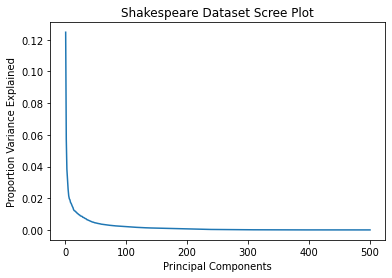

In [10]:
# your code here
# Scree Plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure()
explained_var = model_pca.stages[-1].explainedVariance
plt.plot(np.arange(1, len(explained_var)+1), explained_var)
plt.title("Shakespeare Dataset Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Proportion Variance Explained")

Text(0, 0.5, 'Cumulative Sum of Variance Explained')

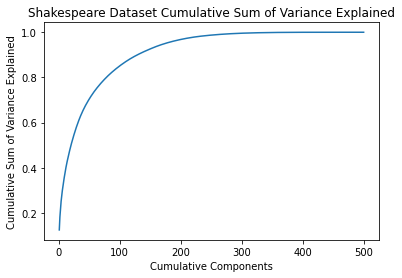

In [11]:
# your code here
# Cumulative Variance explained plot
cum_sum = np.cumsum(explained_var)
plt.figure()
plt.plot(np.arange(1, len(explained_var)+1), cum_sum)
plt.title("Shakespeare Dataset Cumulative Sum of Variance Explained")
plt.xlabel("Cumulative Components")
plt.ylabel("Cumulative Sum of Variance Explained")

Your explanation here: 

how many princiapal components would you pick such that the number of data columns is reduced from the original data set but you still capture a reasonable amount of variance in the data.

In order to identify a suitable number for principal component, we need to observe the scree plot and cumulative variance explained plot to locate the "elbow". In both IRLS textbook and course slides, we are recommended to eyeball this point in order to maximize the explained variance and minimize the number of pricipal component. Looking into these two plots, I consider a value of 300 is reasonable. This is because, in scree plot, anything more than 300 is close to 0 for explained variance (y-value) and the line mostly stays flat moving along the x-axis. With this value in mind, I then looking into the cumulative variance explained plot and found that a value of 300 captured almost 100% of explained variance and anything more than 300 remains flat as well.

Thus, I think 300 is a suitable number for principal component number.

# Question 4 (20 pts):
In this question your will write code which makes recommendations on new characters to study based on a specific character that a Shakespeare fan likes.

Create a function named get_nearest_chars that takes 2 arguments: char and num_nearest_chars. The char arg is a string which defines the character for which we are interested in finding similar characters. The num_nearest_chars arg is an integer that defines the total number of nearest characters which we want included in the return list. The get_nearest_chars function shall perform all of its internal operations in spark and return a python list containing a string corresponding to each of the nearest characters defined by num_nearest_chars. Compute the list of characterss which are closest to the char arg using L2 Euclidian distance. 

Hint: Start by creating a new pipe named pipe_pca_2 that is the same as pipe_pca_1 except set K equal to 2 when instantiating the PCA object. We are essentially fixing the number of PCA components to 2 so that we will limit the Euclidian distance to 2 dimensions for this problem. 

Your get_nearest_chars function should rigorously error check input data to verify that the user is not making illegal requests. We plan on trying your code against secret tests which verify your error checking to make the challenge more interesting. You are free to break the problem up into as many sub functions as you wish but you must implement get_nearest_chars as the top level entry point to your code.

In [12]:
from pyspark.sql import types
from pyspark.ml.feature import Normalizer
# tokenizer object
#tokenizer = Tokenizer(inputCol="all_quotes", outputCol="words")
tokenizer = RegexTokenizer(minTokenLength=2)\
  .setGaps(False)\
  .setPattern("\\p{L}+")\
  .setInputCol("all_quotes")\
  .setOutputCol("words")

# stop word filter object
sw_remover = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("words_clean")

# tf object: compute tf score
#cv = CountVectorizer(minTF=4., minDF=10.,vocabSize = 2**17, inputCol='words_clean', outputCol="tf")
cv = CountVectorizer(minTF=1., minDF=5.,vocabSize = 2**10, inputCol='words_clean', outputCol="tf")
# idf object: compute tfidf score
idf = IDF(inputCol="tf", outputCol="tfidf")

# normalizer object
#norm = Normalizer(inputCol='tfidf', outputCol='norm_tfidf')

# standardize scaler object: (centering dataset)
center = StandardScaler(withMean=True,
                           inputCol='tfidf', outputCol='z_tfidf')

# pricipal component analysis object (k = 2, fixing the number of PCA components to 2 so that we will limit the Euclidian distance to 2 dimensions ) 
pca = PCA(k=2, inputCol='z_tfidf', outputCol='scores')

# PCA pipeline 
pipe_pca_2 = Pipeline(stages=[tokenizer, sw_remover, cv, idf, center, pca])

# Fit the pipeline to quotes_by_char_df
model_pca = pipe_pca_2.fit(quotes_by_char_df)

# Find the euclidian distance with UDF
def l2_dist(c1, c2):    
    return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))

l2_dist_udf = fn.udf(l2_dist, types.FloatType())



In [13]:
# your code here
from pyspark.sql import functions as fn
spark.sql("SET spark.sql.crossJoin.enabled=TRUE")
def get_nearest_chars(char, num_nearest_chars):
  # Input type: char (str), num_nearest_chars (int)
  # Expected output: List of strings of nearest characters
  df = model_pca.transform(quotes_by_char_df).where(fn.col('character')==char).select(fn.col("scores").alias('requested character scores')).join(model_pca.transform(quotes_by_char_df)).withColumn('dist', l2_dist_udf('scores', 'requested character scores')).where('dist >0').select("character", "dist").orderBy(fn.asc("dist")).limit(num_nearest_chars).select('character').rdd.map(lambda x: x[0]).collect()
  # The first character is the input character and we need to filter out to find the closest five characters name
  return df



In [14]:
# grading cell - do non modify
print(get_nearest_chars('romeo', 5))
print(get_nearest_chars('juliet', 5))

['helena', 'macbeth', 'pericles', 'juliet', 'coriolanus']
['coriolanus', 'prospero', 'hotspur', 'romeo', 'leontes']


# Question 5 (10 pts):
Using PCA score data from PC1 and PC2, create a 2 dimensional character visualization plot which shows what characters are similar to the `juliet` character.  Your plot should clearly label the characters closest to juliet but not contain so many labels that it is hard or impossible to interpret.  Filter the data as needed to make a nice visualization which is easy to read and interpret.  You can use pipe_pca_2 for this question.

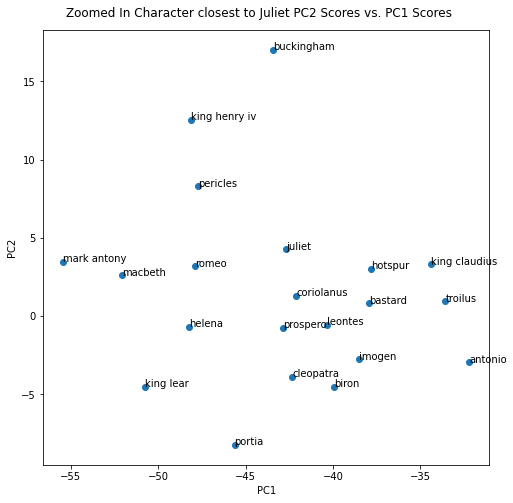

In [16]:
# your code here

# Extract the closest 20 characters list with juliet
chars = get_nearest_chars('juliet', 20)
chars.append('juliet')
juliet_df = model_pca.transform(quotes_by_char_df).where(fn.col('character').isin(chars)).select('character','scores')

#extract pca score and character names
X = np.array(juliet_df.rdd.map(lambda x: x['scores']).collect())
char_names = juliet_df.rdd.map(lambda x: x['character']).collect()

#plot the data
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
ax.scatter(X[:,0], X[:,1])
fig.suptitle("Zoomed In Character closest to Juliet PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Annotate each data point with character names
for i, txt in enumerate(char_names):
      ax.annotate(txt, (X[i,0], X[i,1]))   

plt.show()

# Question 6 (10 pts)
Perform an inference analysis on the 10 most and 10 least important words in the data set as defined by the absolute value of the PC1 loading vector coefficients.  Present the data by loading and printing 2 Pandas data frames containing the 10 most important words and 10 least important words named `most_imp_df` and `least_imp_df` respectively.  The data frames shall have 2 columns named `word` and `loading`.  Provide a written interpretation of the word importances.  You can use pipe_pca_2 for this question.

In [17]:
# your code here
import pandas as pd
import numpy as np

pca_model = model_pca.stages[-1]
pc1 = pca_model.pc.toArray()[:, 0].tolist()
vocabulary = model_pca.stages[2].vocabulary

pc_loadings = pd.DataFrame([vocabulary, pc1]).T.rename(columns={0: 'word', 1: 'loading'})

most_imp_df = pc_loadings.sort_values(by='loading', ascending=True).\
    apply({'word': lambda x: x, 'loading': np.abs}, axis=0).head(10)

least_imp_df = pc_loadings.sort_values(by='loading', ascending=False).\
    apply({'word': lambda x: x, 'loading': np.abs}, axis=0).head(10)

In [18]:
# grading cell - do not modify
display(most_imp_df)
display(least_imp_df)

,word,loading
2,shall,0.0592972
16,make,0.0585997
9,let,0.0585866
13,like,0.057007
12,hath,0.0570021
14,know,0.0569495
15,say,0.0566399
8,ll,0.0561316
7,come,0.0552637
3,thee,0.0548899


,word,loading
500,don,0.00130088
332,antipholus,0.00267373
892,hero,0.00476393
753,achilles,0.00479914
957,valentine,0.00512993
705,monster,0.00531896
574,timon,0.00547056
671,troilus,0.00551025
986,ajax,0.00554097
856,antonio,0.00594036


Your explanation here

Based on the absolute value of the words' pc loadings, I am able to generate 10 most important and least important words. Since pc loading values can be inferred as correlation coefficients, the greater the pc loading values are, the higher variance that those words captured. The most imporant words with high variance also dictated the space direction of the characters. These are the words that differential the characteristics of the character and lead to big variance. On the other hand, the least important words with low loading values do not have strong impact for characters' unique features. 

# Part 2: K-Means Clustering

# Question 7 (10 pts)
Read the python K-means [docs](https://spark.apache.org/docs/latest/ml-clustering.html#k-means).  Use the `chars_pca_df` from question 2 above and compute K-Means silhouette scores for K = 2 through 6 on the PCA score data. You are free to create a new dataframe to reorganize the PCA data or regenerate the data in chars_pca_df if you wish.   Train your model on each K 3 times to find the lowest silhouette score.  The silhouette score is a measure of within cluster variation.  Remember that because K-Means starts out with random cluster assignments, it is not guaranteed to find a global minima so you should make multiple runs to find the lowest score.  Plot the silhouette scores vs. K and report the lowest silhouette score from the plot. If the process of finding the lowest silhouette scores is taking too much time, reduce the number of PCA score columns such that you capture a reasonable amount of variance but complete training in a more reasonable amount of time.  The work you did in question 3 above could be useful here.

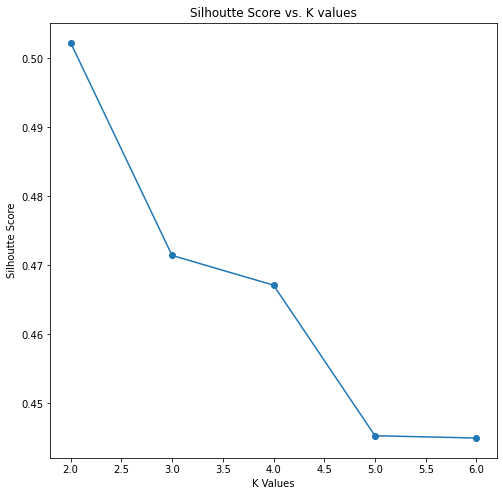

The highest silhouette score for each cluster:  0.5022769305300375


In [19]:
# your code here
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import Normalizer
from pyspark.ml.evaluation import ClusteringEvaluator

k_score = []

#define evaluator
evaluator = ClusteringEvaluator().setFeaturesCol('norm_tfidf').setPredictionCol('kmeans_feature')

for k in np.arange(2,7):
  normal = Normalizer().setInputCol('z_tfidf').setOutputCol('norm_tfidf').setP(2.0)
  kmeans = KMeans().setFeaturesCol('norm_tfidf').setPredictionCol('kmeans_feature').setK(k)
  sil_list = []
#calcualte kmean clustering model's silhoutte score for 3 times
  for trial in range(3):
    kmeans_model = Pipeline(stages=[normal, kmeans]).fit(chars_pca_df)
    prediction = kmeans_model.transform(chars_pca_df)
    score = evaluator.evaluate(prediction)
    sil_list.append(score)

  k_score.append(max(sil_list))

# Plotting
plt.figure(figsize=(8,8))
plt.plot(np.arange(2,7),k_score, 'o', ls = '-')
plt.xlabel('K Values')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score vs. K values')
plt.show()
print('The highest silhouette score for each cluster: ', max(k_score))

# Question 8 (20 pts)
Perform K-Means clustering using the `chars_pca_df` and plot the results using a scatter plot.  Color the points by cluster assignment.  You are allowed to create a new dataframe from chars_pca_df or regenerate the data if you wish.  The work you did in question 7 above can be applied directly to this problem.  The goal of this question is to try to find an interesting insight about the Shakespeare characters.  For example, perhaps you spot one or more outlier characters that stands apart from the rest of the characters in the cluster.  An example of this is how IST-718 and IST-719 stand out from the rest of the cluster in the unsupervised learning notebook presented in class (though that plot did not use K-Means clustering, it only used PCA).  Note that in the previous example, I am only providing an example of 1 type of interesting insight.  When you find something interesting, add labels to the points of interest so that the reader of your plot can understand the insight.  Provide an explanation of your insight.  This question is completely open ended and you are free to generate the clusters any way you see fit as long as you use K-Means and your methodology follows good data science practices.  You can plot the observation data in 2 dimensions by using PC1 and PC2 as the X and Y coordinates.  Your plot should be easy to read and not overly cluttered.  This question will be graded on your level of effort in comparison to what insights other students in the class find.

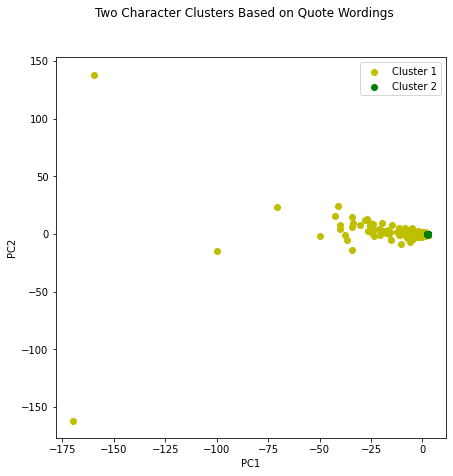

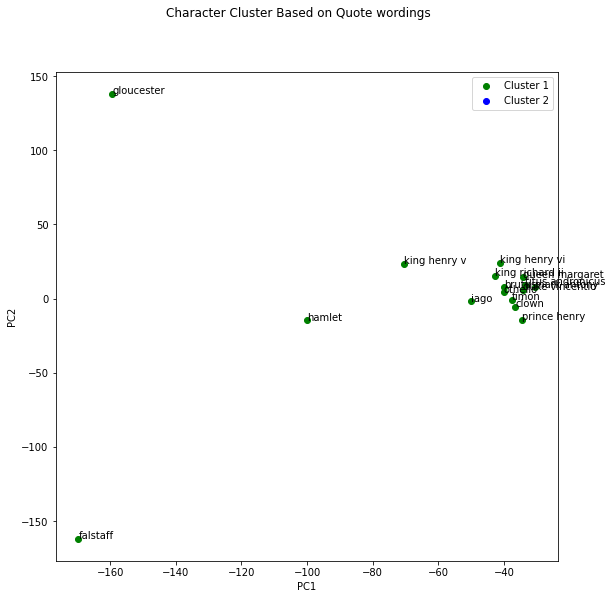

In [26]:
# your code here

# Trains a k-means model with two clusters
normal = Normalizer().setInputCol('z_tfidf').setOutputCol('norm_tfidf').setP(2)
kmeans = KMeans().setFeaturesCol('norm_tfidf').setPredictionCol('prediction').setK(2)
kmeans_model = Pipeline(stages=[normal, kmeans]).fit(chars_pca_df)

# Make predictions
prediction_df = kmeans_model.transform(chars_pca_df)

# Extract information: character names, PC1 & PC2 scores, Predictions
Score_c1 = np.array(prediction_df.where(fn.col('prediction')==1).rdd.map(lambda x: x['scores']).collect())
Score_c2 = np.array(prediction_df.where(fn.col('prediction')==0).rdd.map(lambda x: x['scores']).collect())
char_c1 = np.array(prediction_df.where(fn.col('prediction')==1).rdd.map(lambda x: x['character']).collect())
char_c2 = np.array(prediction_df.where(fn.col('prediction')==0).rdd.map(lambda x: x['character']).collect())

# plot the cluster plot
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)

# Part 1: plot clusters with different colors
ax.scatter(Score_c1[:,0], Score_c1[:,1],c='y',label='Cluster 1')
ax.scatter(Score_c2[:,0], Score_c2[:,1],c='g',label='Cluster 2')
fig.suptitle("Two Character Clusters Based on Quote Wordings")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.legend()
plt.show()

# Data Filtering in cluster 1
idx_1 = Score_c1[:, 0] <-30
Score_c1 = Score_c1[idx_1]
char_c1 = char_c1[idx_1]

# Data Filtering in cluster 2
idx_2 = Score_c2[:, 0] < -30
Score_c2 = Score_c2[idx_2]
char_c2 = char_c2[idx_2]


# Plotting part 2
fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(9)

# Part 2: plot clusters with different colors
ax.scatter(Score_c1[:,0], Score_c1[:,1],c='g',label='Cluster 1')
ax.scatter(Score_c2[:,0], Score_c2[:,1],c='b',label='Cluster 2')
fig.suptitle("Character Cluster Based on Quote wordings")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Annotation
for i, txt in enumerate(char_c1):
  ax.annotate(txt, (Score_c1[i,0], Score_c1[i,1]))

for i, txt in enumerate(char_c2):
  ax.annotate(txt, (Score_c2[i,0]+50, Score_c2[i,1]-20))
plt.legend()
plt.show()



Your insight explanation here:

What I did for question 8 is to investigate whether there is any outliner character among all the Shakespeare's characters. In the data we are provided, I generated the normalizd tfidf data from the all_quotes column and I hope to identify the potential outliner characters from the quotes each character has. By using tfidf data as input for k - means clustering analysis, I am able to identify two outliner characters based on the TF-IDF quote data. In the meantime, I used PC1 scores and PC2 scores for x and y axis in order to better illustrate the cluster (Lower dimension). Based on the k-means clustering prediction, falstaff and gloucester are the two outliner characters from each of their respected clusters. However, as we observed the scatterplot, the obvious outliners are falstaff and gloucester based on PC1 and PC2 scores. Despite that the characters timon and isabella are relatively closer to cluster group zero, the outliners can potentially be presented better with different PC scores as axises.

To summarize my analysis, we can find that falstaff and gloucester are the outliner characters from their quotes and shakespeare intentionally and secretly created these two outliners with the words he chose!
